In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data collection and processing

In [2]:
car_data = pd.read_csv('car data.csv')

In [3]:
# inspecting first 5 rows of data set
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the no of rows and columns
car_data.shape

(301, 9)

In [5]:
# information of data set
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorial data
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

In [9]:
from matplotlib import style

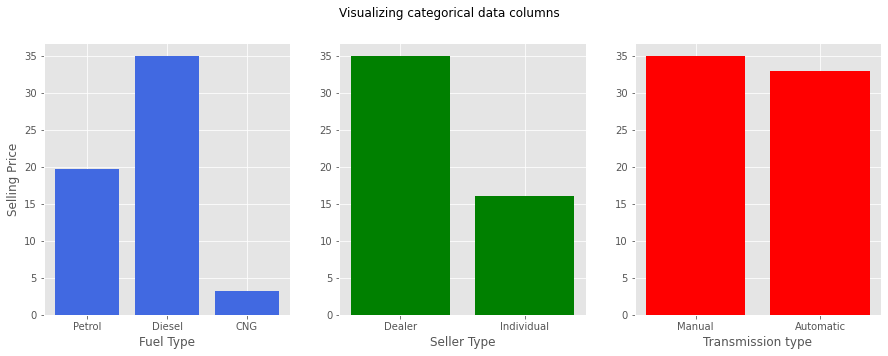

In [10]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='green')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='red')
plt.xlabel('Transmission type')
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

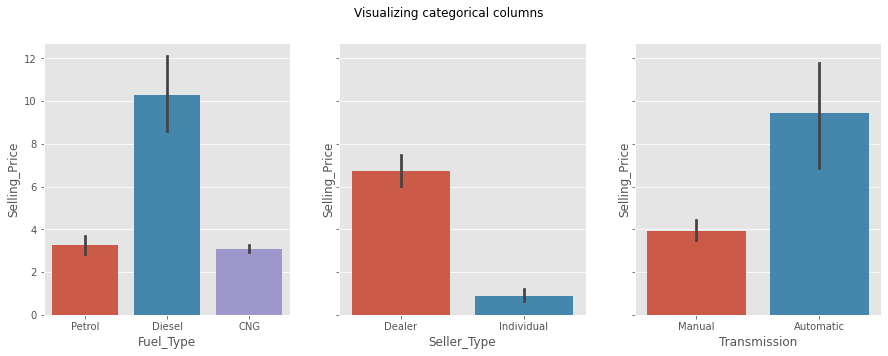

In [11]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [12]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [13]:
seller_data = car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


# Encoding the categorial data

In [14]:
# encoding "Fuel_Type" column
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
# encoding "Seller_Type" column
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
# encoding "Transmission" column
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [15]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


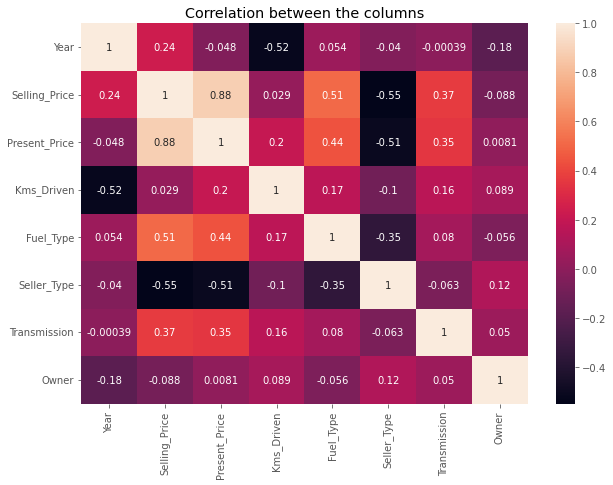

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

<AxesSubplot:title={'center':'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

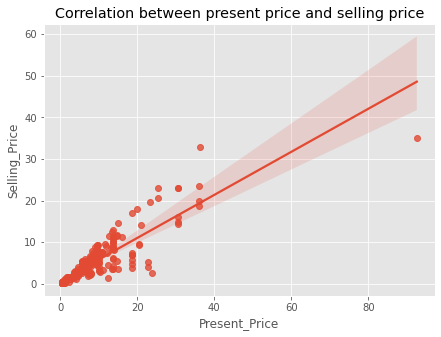

In [17]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

# Splitting the data

In [30]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [31]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting training and test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

# Model Training
Linear regression

In [22]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [24]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
# R squared error and mean absolute error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)
mean_absolute_error = metrics.mean_absolute_error(training_data_prediction, Y_train)
print("mean_absolute_error : ", mean_absolute_error)

R squared error :  0.87994516604937
mean_absolute_error :  1.216617409391776


# Visualize the actual prices and predicted prices

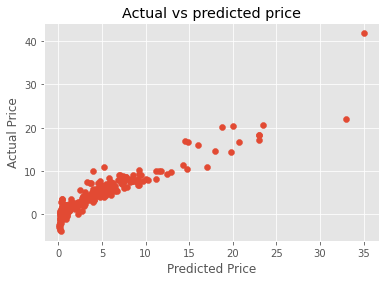

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

In [27]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [28]:
# R squared error and mean absolute error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)
mean_absolute_error = metrics.mean_absolute_error(test_data_prediction, Y_test)
print("mean_absolute_error : ", mean_absolute_error)

R squared error :  0.8365766715025409
mean_absolute_error :  1.151638215662075


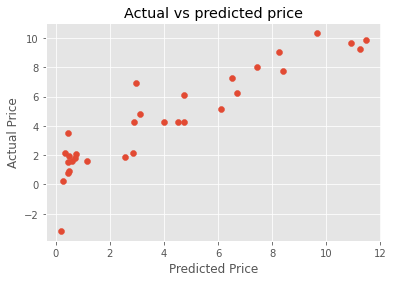

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

# Lasso regression

In [34]:
# loading the linear regression model
lass_reg_model = Lasso()

In [35]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [36]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [37]:
# R squared error and mean absolute error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)
mean_absolute_error = metrics.mean_absolute_error(training_data_prediction, Y_train)
print("mean_absolute_error : ", mean_absolute_error)

R squared error :  0.8427856123435794
mean_absolute_error :  1.2863097696916528


# Visualize the actual prices and predicted prices

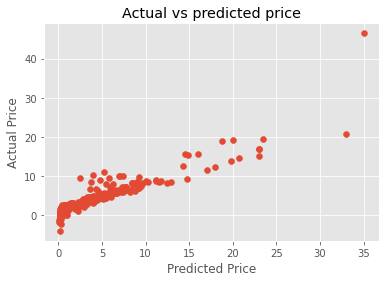

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

In [39]:
#prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [40]:
# R squared error and mean absolute error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)
mean_absolute_error = metrics.mean_absolute_error(test_data_prediction, Y_test)
print("mean_absolute_error : ", mean_absolute_error)

R squared error :  0.8709167941173195
mean_absolute_error :  1.0507413774170433


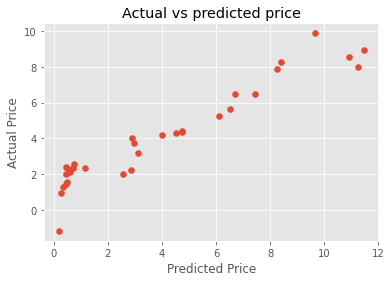

In [41]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

# model evaluation completed